# Classification Models with Keras

In [5]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [6]:
import matplotlib.pyplot as plt

In [7]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 24s 2us/step


In [8]:
X_train.shape

(60000, 28, 28)

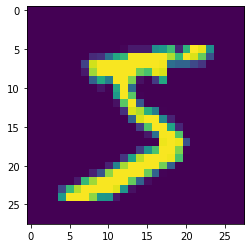

In [9]:
plt.imshow(X_train[0])

In [10]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [11]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [12]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


## Build a Neural Network

In [13]:
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Train and Test

In [14]:
model = classification_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 8s - loss: 0.1846 - accuracy: 0.9449 - val_loss: 0.0972 - val_accuracy: 0.9701
Epoch 2/10
1875/1875 - 7s - loss: 0.0783 - accuracy: 0.9759 - val_loss: 0.0778 - val_accuracy: 0.9761
Epoch 3/10
1875/1875 - 7s - loss: 0.0542 - accuracy: 0.9827 - val_loss: 0.0800 - val_accuracy: 0.9760
Epoch 4/10
1875/1875 - 7s - loss: 0.0400 - accuracy: 0.9869 - val_loss: 0.0769 - val_accuracy: 0.9790
Epoch 5/10
1875/1875 - 7s - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0736 - val_accuracy: 0.9792
Epoch 6/10
1875/1875 - 7s - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.0775 - val_accuracy: 0.9794
Epoch 7/10
1875/1875 - 8s - loss: 0.0239 - accuracy: 0.9920 - val_loss: 0.0817 - val_accuracy: 0.9815
Epoch 8/10
1875/1875 - 7s - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0724 - val_accuracy: 0.9837
Epoch 9/10
1875/1875 - 6s - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0775 - val_accuracy: 0.9807
Epoch 10/10
1875/1875 - 6s - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0970 - 

In [15]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1])) 

Accuracy: 0.9807999730110168% 
 Error: 0.019200026988983154


In [16]:
model.save('classification_model.h5')

In [17]:
from keras.models import load_model
pretrained_model = load_model('classification_model.h5')